<h1>Houses from London Price Prediction</h1>
<p>In this notebook, I will attempt to create a regression model that is able to predict house prices using a dataset
from Kaggle</p>

<h2>Data Collection</h2>

<p>Let's start by importing the necessary libraries</p>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import plotly.express as px
import plotly.graph_objects as go
import folium as fo
import kagglehub
from kagglehub import KaggleDatasetAdapter

<p>Next, let's use the Kaggle API to load the data</p>

In [20]:
file_path = "london_houses.csv"

# Load the latest version
df: pd.DataFrame = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "oktayrdeki/houses-in-london",
  file_path,
)

# Get an insight on the data
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


<h2>Data Cleansing</h2>

<p>Let's look at the data types of each column and if there are any null values</p>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

<p>There are no null values, now we can move on to feature engineering</p>

<h2>Feature Engineering</h2>

<p>Here is a sample of the dataframe before feature engineering</p>

In [22]:
df.head(5)

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


<p>First, for columns Garden and Garage, the values are yes and no</p>

In [23]:
bool_cols = ['Garden', 'Garage']
[df[col].value_counts() for col in bool_cols]

[Garden
 Yes    512
 No     488
 Name: count, dtype: int64,
 Garage
 Yes    501
 No     499
 Name: count, dtype: int64]

<p>Let's convert those values to binary; 0 and 1</p>

In [24]:
df[bool_cols] = df[bool_cols].map(lambda x: int(x == "Yes"))
df[bool_cols]

,Garden,Garage
0,0,0
1,1,0
2,0,1
3,1,1
4,0,1
...,...,...
995,1,1
996,0,0
997,0,1
998,1,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   int64 
 7   Garage           1000 non-null   int64 
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(8), object(9)
memory usag

In [26]:
int_cols = df.describe(include="number").columns.to_list()
int_cols

['Bedrooms',
 'Bathrooms',
 'Square Meters',
 'Building Age',
 'Garden',
 'Garage',
 'Floors',
 'Price (£)']

<p>Next, let's create a new column 'street' from the address column</p>

In [27]:
df['Address'].value_counts()

Address
96 King's Road       4
91 King's Road       4
58 Fleet Street      4
143 Strand           3
130 Bond Street      3
                    ..
97 Oxford Street     1
103 Park Lane        1
120 Regent Street    1
97 King's Road       1
145 Baker Street     1
Name: count, Length: 770, dtype: int64

In [28]:
df['Street'] = df['Address'].apply(lambda a: a.split(' ', 1)[1])
df['Street'].value_counts()

Street
Fleet Street          122
King's Road           109
Bond Street           108
Strand                101
Piccadilly Circus      98
Oxford Street          96
Regent Street          92
Baker Street           92
Park Lane              92
Camden High Street     90
Name: count, dtype: int64

<p>Then, let's one hot encode all the categorical columns (not address)</p>

In [29]:
cat_cols = df.drop('Address', axis=1).describe(include='object').columns.to_list()
cat_df = df[cat_cols]
cat_df.head()

,Neighborhood,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Street
0,Notting Hill,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,Regent Street
1,Westminster,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,Oxford Street
2,Soho,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,Regent Street
3,Islington,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,Piccadilly Circus
4,Marylebone,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,Fleet Street


<p>Dummifying the dataset with the categorical columns</p>

In [30]:
dummified_df = pd.get_dummies(cat_df, dtype='int')
dummified_df.head()

,Neighborhood_Camden,Neighborhood_Chelsea,Neighborhood_Greenwich,Neighborhood_Islington,Neighborhood_Kensington,Neighborhood_Marylebone,Neighborhood_Notting Hill,Neighborhood_Shoreditch,Neighborhood_Soho,Neighborhood_Westminster,...,Street_Baker Street,Street_Bond Street,Street_Camden High Street,Street_Fleet Street,Street_King's Road,Street_Oxford Street,Street_Park Lane,Street_Piccadilly Circus,Street_Regent Street,Street_Strand
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


<p>Finally, let's merge the dummified dataset with the original dataset</p>

In [31]:
df = pd.concat([df, dummified_df], axis=1)

<p>Let's also rename the price (£) column to something more practical</p>

In [32]:
df.rename(columns={"Price (£)": "Price"}, inplace=True)

<p>And here is a sample of the dataframe after feature engineering</p>

In [33]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Street_Baker Street,Street_Bond Street,Street_Camden High Street,Street_Fleet Street,Street_King's Road,Street_Oxford Street,Street_Park Lane,Street_Piccadilly Circus,Street_Regent Street,Street_Strand
0,78 Regent Street,Notting Hill,2,3,179,72,0,0,3,Semi-Detached,...,0,0,0,0,0,0,0,0,1,0
1,198 Oxford Street,Westminster,2,1,123,34,1,0,1,Apartment,...,0,0,0,0,0,1,0,0,0,0
2,18 Regent Street,Soho,5,3,168,38,0,1,3,Semi-Detached,...,0,0,0,0,0,0,0,0,1,0
3,39 Piccadilly Circus,Islington,5,1,237,53,1,1,1,Apartment,...,0,0,0,0,0,0,0,1,0,0
4,116 Fleet Street,Marylebone,4,1,127,23,0,1,2,Semi-Detached,...,0,0,0,1,0,0,0,0,0,0


<h2>Exploratory Data Analysis</h2>

<p>Now, I will try to find some insights in the data, and use those to train a model</p>

<p>Let's do some visual analysis now</p>

<h3>Visual Analysis</h3>
<p>First, let's look at the neighborhoods on a map and see if their prices are related to their correlation</p>

In [34]:
neighborhood_df = df.groupby("Neighborhood")[['Price']].mean().reset_index()

london_locations = {
    "Camden":        (51.5416, -0.1432),
    "Chelsea":       (51.4875, -0.1687),
    "Greenwich":     (51.4826,  0.0077),
    "Islington":     (51.5380, -0.0996),
    "Kensington":    (51.4998, -0.1937),
    "Marylebone":    (51.5225, -0.1631),
    "Notting Hill":  (51.5096, -0.1960),
    "Shoreditch":    (51.5245, -0.0786),
    "Soho":          (51.5136, -0.1365),
    "Westminster":   (51.4975, -0.1357)
}

palette = [
    "#1f77b4",  # blue
    "#f2a159",  # orange
    "#4fa34f",  # green
    "#cf4d4d",  # red
    "#9176ab",  # purple
    "#92675e"   # brown
]

center_london = (51.5074, -0.1278)
uk_map = fo.Map(center_london, zoom_start=11)

for i, (neighborhood, (lat, long)) in enumerate(london_locations.items()):
    color = palette[i % len(palette)]
    price = int(neighborhood_df.loc[i, 'Price'])
    marker = fo.CircleMarker(
        (lat, long),
        radius=price // 100000,
        tooltip=f"<p><strong>{neighborhood}</strong>: £{price:,}</p>",
        fill=True,
        fill_opacity=0.6,
        fill_color = color,
        color = color,

    ).add_to(uk_map)

uk_map

In [35]:
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

distances_from_center = {}
for i, (neighborhood, (lat, long)) in enumerate(london_locations.items()):
    distances_from_center[neighborhood] = calculate_distance(*center_london, lat, long)

df['DistanceLondon'] = df['Neighborhood'].apply(lambda n: distances_from_center[n])

<p>I will look at the correlation of the features with the price in descending order</p>

In [36]:
num_cols = df.describe(include='number').columns.to_list()
price_corr_df = pd.DataFrame(df[num_cols].corr()['Price'].reset_index())
price_corr_df.rename(columns={"index": "Feature", "Price": "Correlation"}, inplace=True)
price_corr_df['Importance'] = price_corr_df['Correlation'].abs()
price_corr_df['Is Categorical'] = price_corr_df['Feature'].map(lambda f: "_" in f)
price_corr_df.sort_values(by="Importance", ascending=False, inplace=True)
price_corr_df = price_corr_df[1:].reset_index(drop=True)
price_corr_df

,Feature,Correlation,Importance,Is Categorical
0,Square Meters,0.790652,0.790652,False
1,Property Type_Detached House,0.291960,0.291960,True
2,Property Type_Apartment,-0.280353,0.280353,True
3,Neighborhood_Chelsea,0.224320,0.224320,True
4,Neighborhood_Greenwich,-0.213077,0.213077,True
5,DistanceLondon,-0.199755,0.199755,False
6,Neighborhood_Shoreditch,-0.180650,0.180650,True
7,Neighborhood_Kensington,0.180156,0.180156,True
8,Neighborhood_Westminster,0.169000,0.169000,True
9,Neighborhood_Islington,-0.124339,0.124339,True


<p>Here we can see that the square metres of the house correlates with the price heavily</p>

<p>Now I will plot some features against price to visualise their relationship</p>

<h4>Square Metres VS Price<h4>

In [37]:
px.scatter(data_frame=df, x='Square Meters', y='Price', title="Square Metres VS Price")

<h4>Property Type VS Price</h4>

In [38]:
property_df = df.groupby("Property Type")[['Price']].mean().reset_index()
px.bar(
    data_frame=property_df,
    x='Property Type',
    y='Price',
    title="Property Type VS Price",
    color='Property Type')

<h4>Neighborhood VS Price</h4>

In [39]:

px.bar(
    data_frame=neighborhood_df,
    x='Neighborhood',
    y='Price',
    title="Neighborhood vs Price",
    color='Neighborhood')

<h4>Building Status VS Price</h4>

In [40]:
status_df = df.groupby("Building Status")[['Price']].mean().reset_index()
px.bar(
    data_frame=status_df,
    x='Building Status',
    y='Price',
    title="Building Status vs Price",
    color='Building Status')

<p>Now let's look at a map of all the neighborhoods and their prices to see if their positions have a relationship</p>

<h2>Model building</h2>

<p>First let's get our training and test sets</p>

In [41]:
# Assign the input data
X = df[num_cols].drop(["Price"], axis=1)
X = X[price_corr_df['Feature']] # Reshuffle columns according to feature importance

# Assign the target data
y = df["Price"]

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<p>We will perform cross validation to determine the best parameters for our model</p>

In [43]:
from itertools import product
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [44]:
paramGrid = {
    'n_features': list(range(1, len(X.columns) + 1, 5)),
    'alpha': [0.1, 1, 5, 10]
}

models = {}
cv = 5

best_test_score = [None, None, 0]
best_train_score = [None, None, np.zeros(cv)]

for pair in product(*paramGrid.values()):
    X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :pair[0]], y, test_size=0.2, random_state=42)

    model = Ridge(alpha=pair[1])
    model.fit(X_train, y_train)

    test_score = model.score(X_test, y_test)
    train_scores = cross_val_score(model, X_test, y_test, cv=cv)

    if test_score > best_test_score[2]:
        best_test_score = [pair, model, test_score]

    if train_scores.mean() > best_train_score[2].mean():
        best_train_score = [pair, model, train_scores]

    val = [pair[0], model, test_score, train_scores]
    if pair[1] not in models:
        models[pair[1]] = [val]
    else:
        models[pair[1]].append(val)

<p>Plotting the results of different hyperparameters</p>

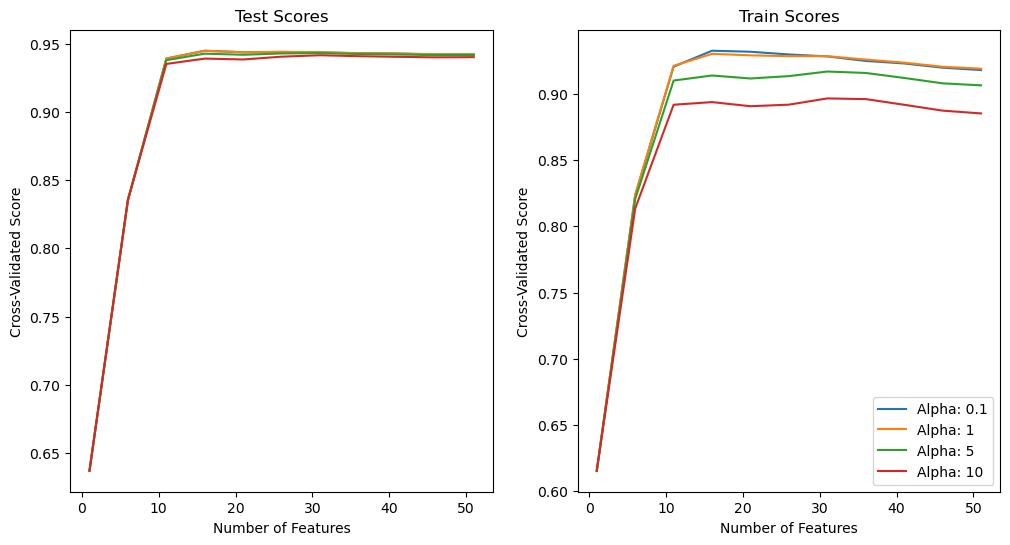

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for alpha, val in models.items():
    n_features = [n[0] for n in val]
    scores = [n[2] for n in val]
    ax[0].plot(n_features, scores, label=f"Alpha: {alpha}")
    ax[0].set_title("Test Scores")
    ax[0].set_xlabel("Number of Features")
    ax[0].set_ylabel("Cross-Validated Score")


for alpha, val in models.items():
    n_features = [n[0] for n in val]
    scores = [n[3].mean() for n in val]
    ax[1].plot(n_features, scores, label=f"Alpha: {alpha}")
    ax[1].set_title("Train Scores")
    ax[1].set_xlabel("Number of Features")
    ax[1].set_ylabel("Cross-Validated Score")

plt.legend()


<p>Let's look at the results now</p>

In [46]:
print(f"Test Score: {best_test_score[2]}")
print(f"Train Score: {best_train_score[2].mean()}, Std of Train Scores: {best_train_score[2].std()}")

Test Score: 0.9448103828502452
Train Score: 0.9324800373733154, Std of Train Scores: 0.010803250214903509


<p>Very good! This tells us that</p>
<ul>
    <li>An R^2 score of 0.94 for the testing data shows that the model can generalise well with unseen data</li>
    <li>An averaged score of cross validation of 0.93 shows that we picked a good model for our data</li>
    <li>A standard deviation of the cross validation scores of 0.01 shows that the model is very consistent across different folds</li>
    <li>A similar score of test and training scores shows that the model is not overfitting</li>
</ul>
<p>In simple terms, the model performs and generalises very well with unseen data</p>

<h2>Conclusion</h2>

<p>I have managed to develop a model that is very good at predicting house prices by tuning hyperparameters, performing techniques like cross validation, and checking important metrics.</p>
<p>We also saw that the size of the house, the property type, and the neighborhood correlates with the price the most (do not assume causing)</p>
<p>However we also saw that there was a general pattern that the closer the houses were to Central London, the more expensive they were</p>